<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/CancerPredictionLogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/breast-cancer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

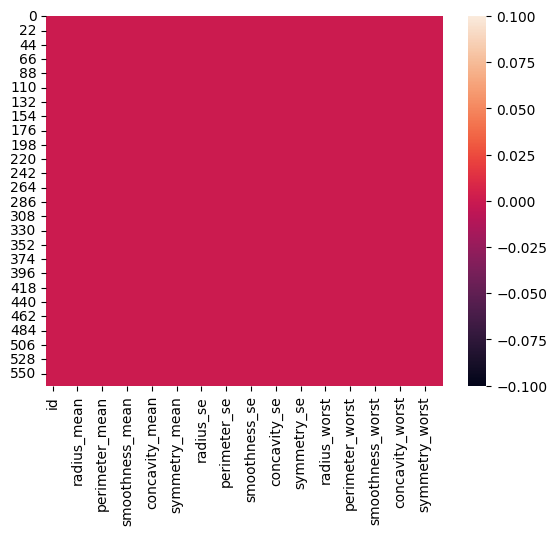

In [ ]:
#CLEANING DATA
sns.heatmap(data.isnull())

In [ ]:
data.drop(['id'],inplace=True,axis=1)

In [ ]:
#converting M to 1 and other as 0

data.diagnosis=[1 if value=="M" else 0 for value in data.diagnosis]

<Axes: xlabel='diagnosis'>

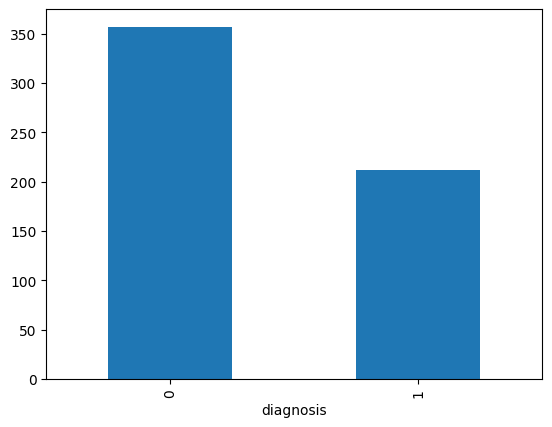

In [ ]:
data["diagnosis"]=data['diagnosis'].astype('category',copy=False)
data['diagnosis'].value_counts().plot(kind='bar')

In [ ]:
# features and target
target=data['diagnosis']
featured=data.drop(['diagnosis'],axis=1)



In [ ]:
from sklearn.preprocessing import StandardScaler

#create scaler obj
scaler=StandardScaler()

#fit scaler to data
scaler.fit(featured)

#transform data
featured=scaler.transform(featured)

SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(featured,target,test_size=0.2,random_state=42)

TRAI MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

#create logistic regression obj
logreg=LogisticRegression()

#fit model to training data
logreg.fit(X_train,y_train)

#predict the target
y_pred=logreg.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
#Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#accuracy score
accuracy_score(y_test,y_pred)

0.9736842105263158

In [ ]:
#pressession
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:

!pip install gradio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import gradio as gr

# Load the dataset (replace with your actual path)
data = pd.read_csv("/content/breast-cancer.csv")

# Data cleaning and preprocessing (same as your original code)
data.drop(['id'], inplace=True, axis=1)
data.diagnosis = [1 if value == "M" else 0 for value in data.diagnosis]
data["diagnosis"] = data['diagnosis'].astype('category', copy=False)
target = data['diagnosis']
featured = data.drop(['diagnosis'], axis=1)

scaler = StandardScaler()
scaler.fit(featured)
featured = scaler.transform(featured)

X_train, X_test, y_train, y_test = train_test_split(featured, target, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Save the trained model
filename = 'breast_cancer_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

def predict_breast_cancer(input_data):
    input_data_scaled = scaler.transform(np.array(input_data).reshape(1, -30))
    prediction = loaded_model.predict(input_data_scaled)[0]
    probability = loaded_model.predict_proba(input_data_scaled)[0]

    # Create visualizations
    fig = go.Figure(data=[go.Bar(x=['Benign', 'Malignant'], y=probability)])
    fig.update_layout(title='Prediction Probability', xaxis_title='Diagnosis', yaxis_title='Probability')

    cm = confusion_matrix(y_test, loaded_model.predict(X_test))
    cm_fig = go.Figure(data=go.Heatmap(z=cm, x=['Predicted Benign', 'Predicted Malignant'], y=['Actual Benign', 'Actual Malignant']))
    cm_fig.update_layout(title='Confusion Matrix')

    return f"Prediction: {'Malignant' if prediction == 1 else 'Benign'}", fig, cm_fig


# Create Gradio interface
iface = gr.Interface(
    fn=predict_breast_cancer,
    inputs=gr.Dataframe(headers=list(data.columns)[:-1], row_count=1),  # Input features
    outputs=[gr.Textbox(), gr.Plot(), gr.Plot()], # Output and visualizations
    title="Breast Cancer Prediction",
    description="Predict breast cancer diagnosis based on input features."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d1c15e708b3a11622d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

# Function to create visualizations (modified)
def create_visualizations(y_true, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_fig = go.Figure(data=go.Heatmap(z=cm, x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1']))
    cm_fig.update_layout(title='Confusion Matrix')

    # Classification Report
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    report_fig = go.Figure(data=[go.Table(header=dict(values=['Metric', 'Value']),
                                        cells=dict(values=[['Precision', 'Recall', 'F1-Score'], [precision, recall, f1]]))])
    report_fig.update_layout(title='Classification Report (Class 1)')


    return cm_fig, report_fig


# Example usage after model prediction
cm_fig, report_fig = create_visualizations(y_test, y_pred)

cm_fig.show()
report_fig.show()
